In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [6]:
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

0.16666666666666666
0.16692033384066768


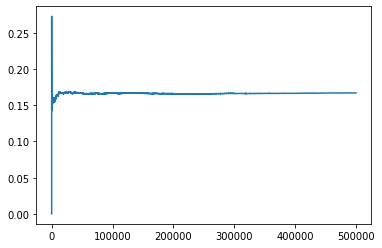

In [2]:
n_a = 0
h = []
for N in range(1,500000):
    a = random.randint(1,6)
    if a == 1:
        n_a += 1
    h.append(n_a/N)

h = np.array(h)
plt.plot(h)

print(1/6)
print(h[-1])

In [3]:
a = [x for x in range (1,11)]
a = np.array(a)
print(a)

b = [x for x in range (1,21) if x % 2 == 0]
b = np.array(b)
print(b)

print(a.mean())
print(b.mean())

print(a.var())
print(b.var())

[ 1  2  3  4  5  6  7  8  9 10]
[ 2  4  6  8 10 12 14 16 18 20]
5.5
11.0
8.25
33.0


In [4]:
t = [x - a.mean() for x in a]
t = np.array(t)
t = np.square(t)
t = t.sum()
t

82.5

In [5]:
null = [0 for x in range(45)]
eins = [1 for x in range(70)]
zwei = [2 for x in range(50)]
drei = [3 for x in range(20)]
vier = [4 for x in range(10)]
fünf = [5 for x in range(5)]

x = null + eins + zwei + drei + vier + fünf

x = np.array(x)
x.var()

1.499375

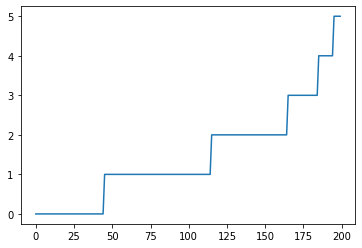

In [6]:
plt.plot(x)

In [8]:
x.std()

1.2244896896258457

In [9]:
z = (x - x.mean()) / x.std()

array([-1.20458344, -1.20458344, -1.20458344, -1.20458344, -1.20458344,
       -1.20458344, -1.20458344, -1.20458344, -1.20458344, -1.20458344,
       -1.20458344, -1.20458344, -1.20458344, -1.20458344, -1.20458344,
       -1.20458344, -1.20458344, -1.20458344, -1.20458344, -1.20458344,
       -1.20458344, -1.20458344, -1.20458344, -1.20458344, -1.20458344,
       -1.20458344, -1.20458344, -1.20458344, -1.20458344, -1.20458344,
       -1.20458344, -1.20458344, -1.20458344, -1.20458344, -1.20458344,
       -1.20458344, -1.20458344, -1.20458344, -1.20458344, -1.20458344,
       -1.20458344, -1.20458344, -1.20458344, -1.20458344, -1.20458344,
       -0.3879167 , -0.3879167 , -0.3879167 , -0.3879167 , -0.3879167 ,
       -0.3879167 , -0.3879167 , -0.3879167 , -0.3879167 , -0.3879167 ,
       -0.3879167 , -0.3879167 , -0.3879167 , -0.3879167 , -0.3879167 ,
       -0.3879167 , -0.3879167 , -0.3879167 , -0.3879167 , -0.3879167 ,
       -0.3879167 , -0.3879167 , -0.3879167 , -0.3879167 , -0.38

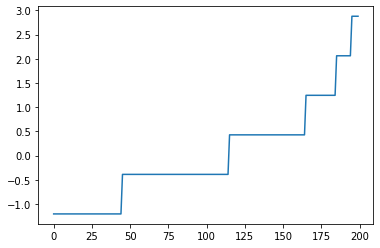

In [12]:
plt.plot(z)
z

[ 7.62115459  1.19630112  3.53380644  9.25439181  7.11829494 -0.39419152
  3.67626798 -0.37559365  0.47366376  2.08654845  1.13644197  6.08890743
  2.7857832   1.05971955  1.69505192  1.57543423  6.26049188 -0.25166129
  1.43649462 -0.57743374 -2.44006216  2.28465414  3.54721625 -0.34424925
  8.87064814 -1.49925604  0.052488    0.36759527  6.33280528  5.99967363
  0.38881488  1.67442484 -1.09008555 -1.9712473  -0.53866597  0.82832586
  5.09413997  4.74702977 -0.2685248  -0.6302212  -1.49593024 -1.28820043
 -1.65626814  7.99361101  0.20529125 -0.15473046 -1.52664203  3.44506631
 -2.00867007 -0.35121566 -0.91593904  2.06161281 -0.73423158 -1.42856375
 -0.05771799  1.514284    0.60405967  0.88590814 -0.97856269 -0.49408718
 -0.82187018  0.21930645 -0.52832004 -1.70001723  0.34207391 -0.14847204
 -1.93026295  1.38769769 -0.55088943  0.30286437  3.1926199   0.61154994
  4.81465192 -1.4301335   1.29909371 -0.48033174 -1.11182005 -0.7857146
 -0.44821228  0.22990512 -1.27134801  3.19082056  1.

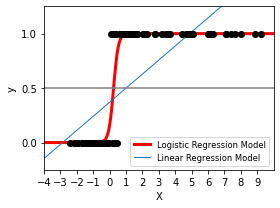

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

print(X)
print(len(X))
print(y)
print(len(y))

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

print(X_test)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

In [7]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [26]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Default,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Payback,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Payback,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [38]:
income = app_train[["TARGET","AMT_INCOME_TOTAL"]].copy()
income.head()

,TARGET,AMT_INCOME_TOTAL
0,1,202500.0
1,0,270000.0
2,0,67500.0
3,0,135000.0
4,0,121500.0


In [53]:
y = income["TARGET"]
x = income.drop(["TARGET"], axis=1)

In [54]:
# logistisches Regressionsmodell
model = LogisticRegression()

In [55]:
model.fit(x,y)

LogisticRegression()

In [42]:
x.head()

,AMT_INCOME_TOTAL
0,202500.0
1,270000.0
2,67500.0
3,135000.0
4,121500.0


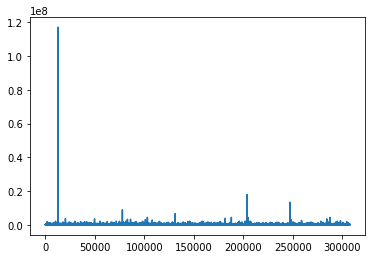

In [45]:
plt.plot(x)

In [61]:
income["AMT_INCOME_TOTAL"].max()

117000000.0

(112500.0, 202500.0)

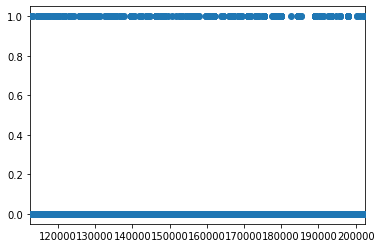

In [88]:
plt.scatter(x, y, zorder=20)
plt.xlim(income["AMT_INCOME_TOTAL"].quantile(0.25),income["AMT_INCOME_TOTAL"].quantile(0.75))

(112500.0, 202500.0)

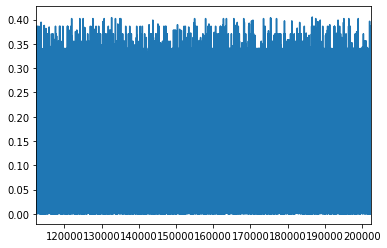

In [98]:
plt.plot(model.predict_proba(x)[:,1])
plt.xlim(income["AMT_INCOME_TOTAL"].quantile(0.25),income["AMT_INCOME_TOTAL"].quantile(0.75))

In [82]:
ann = app_train[["TARGET", "AMT_ANNUITY"]]

(25000.0, 50000.0)

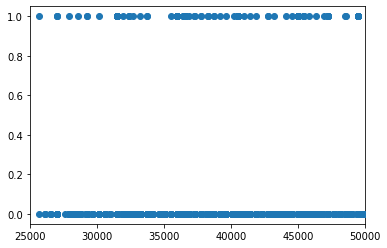

In [87]:
plt.scatter(x, y, zorder=20)
plt.xlim(25000,50000)